In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import math
import logging
from tensorflow import keras
from keras.layers import Dense, SimpleRNN

2022-11-18 20:27:43.974198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 20:27:44.432978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-18 20:27:44.433094: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-18 20:27:44.485824: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 20:27:45.766495: W tensorflow/stream_executor/platform/de

In [3]:
log = tf.get_logger()
log.setLevel(logging.ERROR)

In [4]:
time = np.array([92534400,
    242265600,
    624672000,
    1244419200,
    1539993600,
    1596067200,
    1714521600,
])
speed = np.array([1277.997759,
1106.938346,
3019.28,
3133.160588,
3510.152863,
3390.350877,
3683.833333,
])

In [34]:
model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape=[1], activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1)
                             ])
model.compile(tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.mean_squared_error)

In [35]:
history = model.fit(time, speed, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 505ms/step - loss: 61.3569
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 61.3569
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 61.3569
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 61.3569
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 61.3569
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 61.3569
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 61.3569
Epoch 12/200
1/1 [==============================] - 0s 6ms/step - loss: 61.3569
Epoch 13/200
1/1 [=============================

In [36]:
time_2030 = np.array([1893459661])
speed_2030 = model.predict(time_2030)
print(speed_2030)

1/1 [==============================] - 0s 101ms/step
[[0.]]


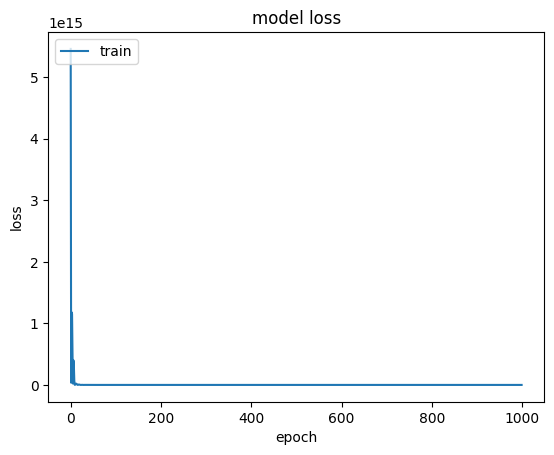

In [27]:
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

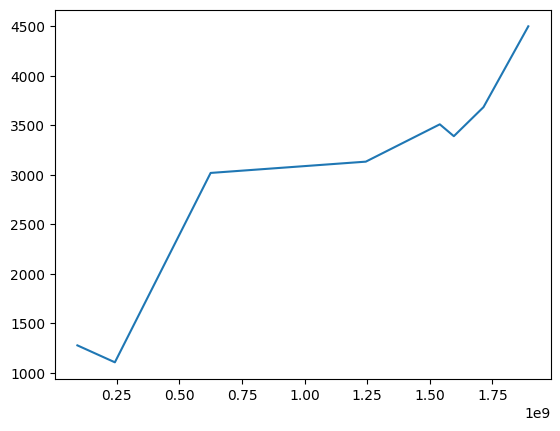

In [15]:
plt.plot(np.append(time, time_2030), np.append(speed, speed_2030))